In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
#
tag = '.tk5'
city_num = 1
#
resolution = 12
#
SUF = '.gl5'
dtype = 'float32'
gl5shape = (2160, 4320)
#
left = 138
right = 141
bottom = 34
top = 38
#
nx, ny = (right - left)*resolution, (top - bottom)*resolution
rgnshape = (ny, nx)
img_extent = (left, right, bottom, top)
#
upperindex = (90-top)*resolution
lowerindex = (90-bottom)*resolution
leftindex = (180+left)*resolution
rightindex = (180+right)*resolution
#
glbdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
rgndir = f"/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region"

In [8]:
ctyint_load = f"{glbdir}/dat/cty_int_/30km_samebasin/city_{city_num:08}{SUF}"
load_list = [ctyint_load]

ctyint_save = f"{rgndir}/dat/cty_int_/30km_samebasin/city_{city_num:08}{tag}"
save_list = [ctyint_save]

In [9]:
# save the files
p0mis = 0

save_flag = True
if save_flag is True:
    for loadfile, savefile in zip(load_list, save_list):
        data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
        region = data[upperindex:lowerindex, leftindex:rightindex]
        region.astype(np.float32).tofile(savefile)
        print(f"{savefile} saved")

/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/cty_int_/30km_samebasin/city_00000001.tk5 saved


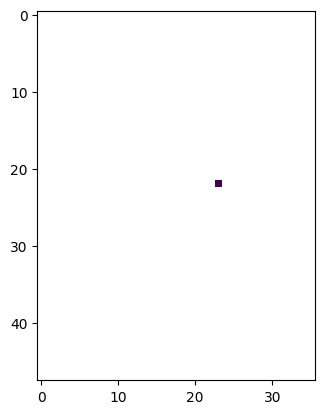

In [10]:
# view the files
tmppath = f"{rgndir}/dat/cty_int_/30km_samebasin/city_{city_num:08}{tag}"
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()